In [1]:
import time
import sys; sys.path.insert(0, "..")
from src.models import NLM, LUNA
from src.utils import generate_data, format_time, neg_log_likelihood, epistemic_uncertainty

In [2]:
from autograd import numpy as np
import matplotlib.pyplot as plt

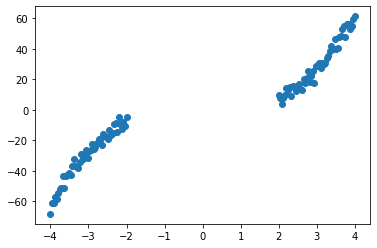

In [3]:
x, y, x_test, y_test = generate_data(number_of_points=50, noise_variance=9)
plt.scatter(x, y)
plt.show()

# Extract test data (gap vs. non-gap)
gap_idx = np.logical_and(x_test > -2, x_test < 2)
x_test_gap = x_test[gap_idx].reshape(1,-1)
y_test_gap = y_test[gap_idx].reshape(1,-1)

non_gap_idx = np.logical_or(np.logical_and(x_test > -4, x_test < -2),np.logical_and(x_test > 2, x_test < 4))
x_test_non_gap = x_test[non_gap_idx].reshape(1,-1)
y_test_non_gap = y_test[non_gap_idx].reshape(1,-1)

In [4]:
def experiment_NLM_1D(reg_param, step_size=1e-2, max_iteration=1500, x_train=x, y_train=y):
    activation_fn_type = 'relu'
    activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)

    input_dim = 1
    output_dim = 1
    width = [50,50] # using the architecture used in the paper

    architecture = {
        'width': width,
        'input_dim': input_dim,
        'output_dim': output_dim,
        'activation_fn_type': 'relu',
        'activation_fn_params': 'rate=1',
        'activation_fn': activation_fn
    }

    params = {
        'step_size': step_size,
        'max_iteration': max_iteration,
        'random_restarts': 1,
        'reg_param': reg_param
    }

    rand_state = 207
    random = np.random.RandomState(rand_state)

    nlm = NLM(architecture, random=random)
    print("")
    print(f"===== NLM [ Regularization: {reg_param} ]  =====")
    print("")
    t0 = time.time()
    nlm.fit(x_train, y_train, params)
    print("")
    print("Training took {:} (h:mm:ss)".format(format_time(time.time()-t0)))

    return nlm

In [5]:
reg_grid = [0., 0.001, 0.01, 0.1, 1., 10., 100.,1000.]

step_size = 1e-2
max_iteration_nlm = 3000


In [6]:
nlm_list = []
for reg in reg_grid:
    nlm = experiment_NLM_1D(reg, step_size = step_size, max_iteration = max_iteration_nlm)
    nlm_list.append(nlm)


===== NLM [ Regularization: 0.0 ]  =====

Iteration 0 loss 8636.087833902706; gradient mag: 19736.95337154503
Iteration 100 loss 79.4508787460473; gradient mag: 77.55985457293626
Iteration 200 loss 23.11983609651275; gradient mag: 32.066417003184114
Iteration 300 loss 9.398643184565243; gradient mag: 8.058368204323509
Iteration 400 loss 7.935423222905505; gradient mag: 3.6128634837316262
Iteration 500 loss 7.558040829095076; gradient mag: 3.6039524957099127
Iteration 600 loss 7.304014177311659; gradient mag: 2.3307399711448733
Iteration 700 loss 7.1247065651539545; gradient mag: 15.39160052261013
Iteration 800 loss 7.088532998698781; gradient mag: 1.803441715428028
Iteration 900 loss 7.080278017653991; gradient mag: 2.8238255694077337
Iteration 1000 loss 7.070310904064405; gradient mag: 6.613733938045769
Iteration 1100 loss 7.067045006694591; gradient mag: 4.744669320302889
Iteration 1200 loss 7.072467552574611; gradient mag: 31.93222615025017
Iteration 1300 loss 7.072132479553643; gr

Iteration 2200 loss 6.903620804906758; gradient mag: 62.33289342175753
Iteration 2300 loss 6.865082773257473; gradient mag: 36.34685776168209
Iteration 2400 loss 6.85487701263933; gradient mag: 38.22509890216314
Iteration 2500 loss 7.045513224467191; gradient mag: 115.1197445448106
Iteration 2600 loss 6.896542714677142; gradient mag: 66.92531321608104
Iteration 2700 loss 6.828320077223966; gradient mag: 19.79142264995751
Iteration 2800 loss 6.963151114351752; gradient mag: 92.41249374198938
Iteration 2900 loss 6.845820529064735; gradient mag: 44.29620687628171

Training took 0:01:56 (h:mm:ss)

===== NLM [ Regularization: 1.0 ]  =====

Iteration 0 loss 8637.151958402543; gradient mag: 19736.955175294417
Iteration 100 loss 60.254993247134784; gradient mag: 104.21903069431798
Iteration 200 loss 11.426391072703675; gradient mag: 15.150555480407439
Iteration 300 loss 8.583255637785584; gradient mag: 7.431333426062928
Iteration 400 loss 7.929765886201364; gradient mag: 18.383304159836033
Ite

Iteration 1300 loss 140.78416912747954; gradient mag: 54.56105949389988
Iteration 1400 loss 128.8827346321368; gradient mag: 12.355428416463273
Iteration 1500 loss 118.79929920964446; gradient mag: 15.615884937769199
Iteration 1600 loss 109.79085155394802; gradient mag: 10.363194268024158
Iteration 1700 loss 101.76485103831885; gradient mag: 10.14497010811569
Iteration 1800 loss 94.62730764813612; gradient mag: 17.602359479524537
Iteration 1900 loss 88.23958095223749; gradient mag: 9.656451304976983
Iteration 2000 loss 82.58455254220124; gradient mag: 11.856954089192023
Iteration 2100 loss 77.56037726257317; gradient mag: 8.947170982075127
Iteration 2200 loss 73.11966523221054; gradient mag: 9.56720094351911
Iteration 2300 loss 69.18328776043748; gradient mag: 9.832686395204332
Iteration 2400 loss 65.71194669140726; gradient mag: 17.95853939777391
Iteration 2500 loss 62.62180367525106; gradient mag: 11.165002846333952
Iteration 2600 loss 59.89660405514978; gradient mag: 9.3164904433630

## Plot prior samples

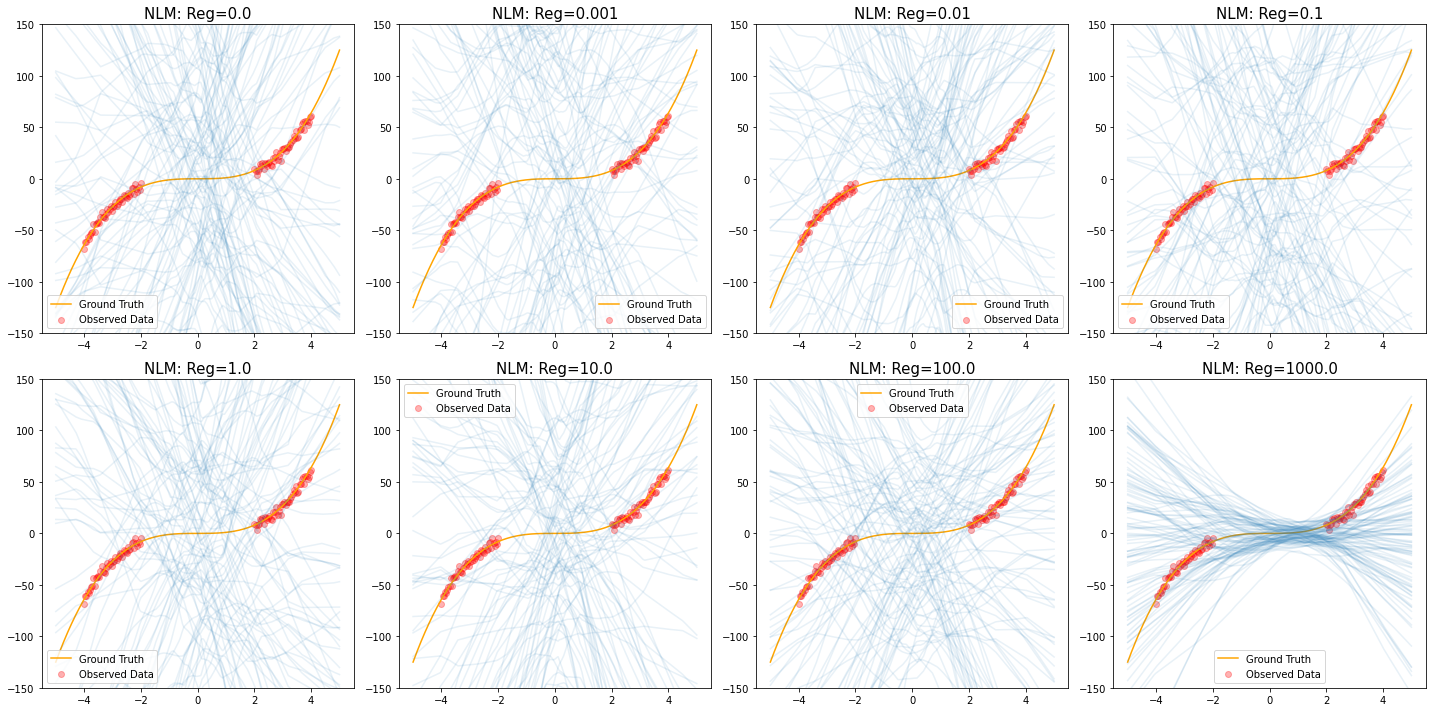

In [7]:
prior_mean = 0; prior_var = 9; noise_var = 9

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_prior = nlm.get_prior_preds(x_test, w_prior_mean = prior_mean, w_prior_cov=prior_var, noise_var=noise_var)
    ax.scatter(x[0,:], y[0,:], color='red', alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_prior.T, color='tab:blue', alpha=0.1)
    ax.set_title(f"NLM: Reg={reg_grid[i]}",fontsize = 15)
    ax.set_ylim([-150, 150])
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()



## Plot posterior samples

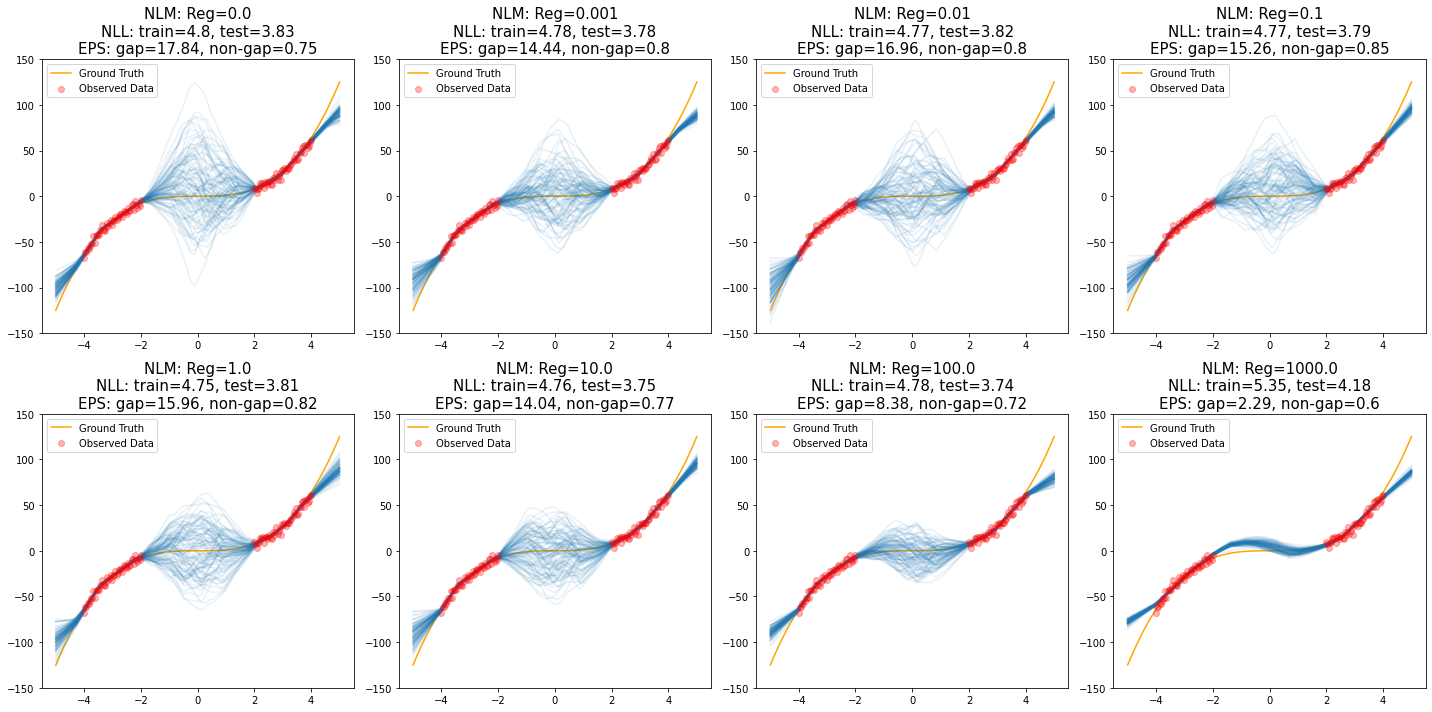

In [11]:
nll_train_list_nlm = []
nll_test_list_nlm = []
eps_gap_list_nlm = []
eps_non_gap_list_nlm = []

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var)
#     y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], y_posterior.T, color='tab:blue', alpha=0.1)
    ax.set_ylim([-150, 150])
    
    y_posterior_train = nlm.get_posterior_preds(x, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_train_noise = y_posterior_train + np.random.normal(0, noise_var**0.5, size=y_posterior_train.shape)
    
    y_posterior_gap = nlm.get_posterior_preds(x_test_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_gap_noise = y_posterior_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_gap.shape)

    y_posterior_non_gap = nlm.get_posterior_preds(x_test_non_gap, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior_non_gap_noise = y_posterior_non_gap + np.random.normal(0, noise_var**0.5, size=y_posterior_non_gap.shape)
    
    nll_train_list_nlm.append(np.round(neg_log_likelihood(y_posterior_train_noise, y, noise_var), 2))
    nll_test_list_nlm.append(np.round(neg_log_likelihood(y_posterior_non_gap_noise, y_test_non_gap, noise_var), 2))
    eps_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_gap), 2))
    eps_non_gap_list_nlm.append(np.round(epistemic_uncertainty(y_posterior_non_gap), 2))
    
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)
    ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()


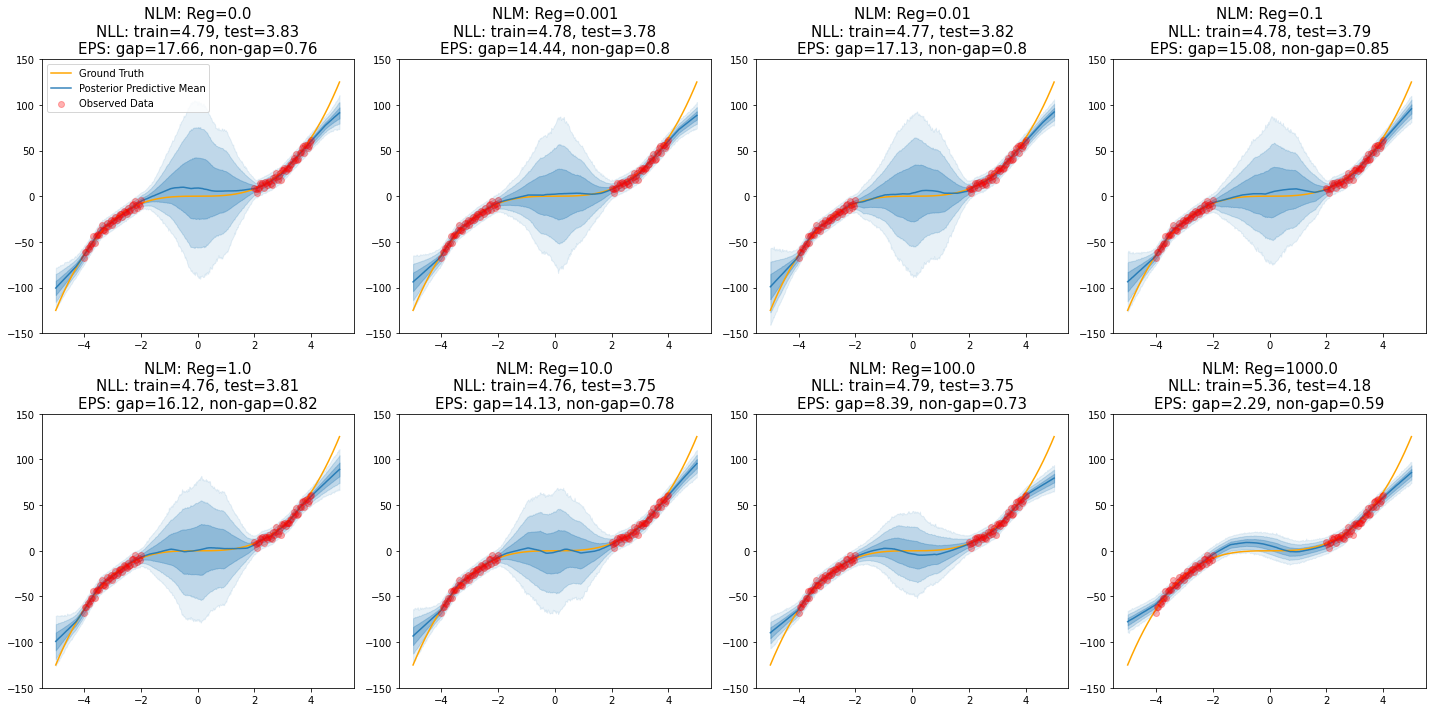

In [10]:
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
for i, ax in enumerate(axes.flat):
    nlm = nlm_list[i]
    y_posterior = nlm.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var, n_models = 5000)
    y_posterior += np.random.normal(0, noise_var**0.5, size = y_posterior.shape)
    
    pp_upper = np.percentile(y_posterior, 97.5, axis=0)
    pp_lower = np.percentile(y_posterior, 2.5, axis=0)
    pp_upper2 = np.percentile(y_posterior, 84, axis=0)
    pp_lower2 = np.percentile(y_posterior, 16, axis=0)
    pp_upper3 = np.percentile(y_posterior, 99.85, axis=0)
    pp_lower3 = np.percentile(y_posterior, 0.15, axis=0)
    pp_mean = np.mean(y_posterior, axis=0)

    ax.scatter(x[0,:], y[0,:], color='red', zorder = 1000, alpha=0.3, label='Observed Data')
    ax.plot(x_test[0,:], x_test[0,:]**3, color='orange', label="Ground Truth")
    ax.plot(x_test[0,:], pp_mean, color='tab:blue', alpha=0.9, label='Posterior Predictive Mean')
    ax.fill_between(x_test[0,:], pp_upper, pp_lower, color='tab:blue', alpha=0.2)
    ax.fill_between(x_test[0,:], pp_upper2, pp_lower2, color = 'tab:blue', alpha = 0.3)
    ax.fill_between(x_test[0,:], pp_upper3, pp_lower3, color = 'tab:blue', alpha = 0.1)

    ax.set_ylim([-150, 150])
    ax.set_title(f"NLM: Reg={reg_grid[i]}\nNLL: train={nll_train_list_nlm[i]}, test={nll_test_list_nlm[i]}\nEPS: gap={eps_gap_list_nlm[i]}, non-gap={eps_non_gap_list_nlm[i]}",fontsize=15)

    if i == 0:
        ax.legend(loc='best')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

